In [1]:
%load_ext autoreload
%autoreload 2
import os
import glob
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
import sys
sys.path.append("../../Code")
sys.path.append("../Tools/python-client")
import settings as s
import utils 
import sql
import files
import seaborn as sns
import languages as lang
import preprocessing as pre

# Get Manhattan Data

In [2]:
listings, reviews, hosts, guests, host_trips, host_reviews = sql.get_manhattan_data()

Retrieved 21473 Manhattan listings
Retrieved 433320 Manhattan reviews
Retrieved 18633 Manhattan hosts
Retrieved only 14839 (79.64%) Manhattan hosts with reviews
Retrieved 11345 Manhattan host trips
Retrieved 501929 reviews from hosts who have hosted Manhattan Guests
Total Number of 397693 guests that have reviewed Manhattan listings
Retrieved 181376 (45.61%) guests that have reviewed Manhattan listings


In [3]:
listings.head(1)

,idListing,id,host_id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,street,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,market,smart_location,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,1,2515,2758,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,None,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,Guests will have their PRIVATE BATHROOM (NOTE:...,We will have a list of Harlem restaurants and ...,no-smoking/please take off your shoes: cleanin...,https://a0.muscache.com/im/pictures/d0489e42-4...,"New York, NY, United States",Harlem,Manhattan,10026,New York,"New York, NY",US,40.7992047993617,-73.9536757454354,t,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$59.00,$720.00,"$1,690.00",$0.00,$60.00,2,$39.00,2,21,13,32,60,329,168,92.0,9.0,9.0,10.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,f,f,1.43


In [4]:
hosts.head(1)

,id,name,since,location,about,response_time,response_rate,is_superhost,neighbourhood,listings_count,total_listings_count,verifications,has_profile_pic,identity_verified,calculated_listings_count
0,4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,None,None,f,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,1


In [5]:
guests.head(1)

,idGuest,id,name,city,ccode,membershipMonth,membershipYear,superhost,verified,description,linkedAccountVerified,schoolInfo,jobInfo,languages,reviewNumber,guideNumber,wishListNumber
0,1,90588613,Kathrin,"Frankfurt, Germany",DE,August,2016,false,false,None,"['Email address', 'Telephone number', 'Facebook']",Hans,null,null,2.0,0.0,0.0


In [6]:
reviews.head(1)

,idGuestReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled
0,1,198,2008-10-13,2603,2515,2758,Stephanie was a wonderful host! Her apartment ...,N


In [7]:
host_trips.head(1)

,idHostTrip,hostId,visited,min_times,city,ccode,country,state
0,1,10001390,"Budapest, Hungary",2,Budapest,HU,Hungary,Unknown


In [8]:
host_reviews.head(1)

,idHostReview,host_name,reviewer_id,recipient_id,comments,total_host_reviews
0,1,Forever,105663223,33642104,Christophe y su familia fueron unos huéspedes ...,3


## Save CSVs

In [9]:
files.save_all('man', guests, hosts, listings, reviews, host_trips, host_reviews)

# Restricting to Single-Listing Hosts 

In [10]:
listings_count = utils.create_value_counts_table(hosts, 'listings_count', 'number_of_man_listings')

In [11]:
listings_count.head(10)

,number_of_man_listings,counts,%
0,1.0,15523,83.31
1,2.0,1970,10.57
2,3.0,569,3.05
3,4.0,210,1.13
4,5.0,93,0.50
5,6.0,47,0.25
6,7.0,31,0.17
7,0.0,30,0.16
8,8.0,25,0.13
9,10.0,17,0.09


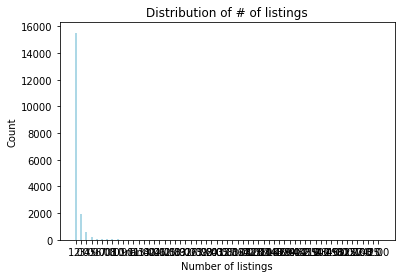

In [12]:
utils.plot_bar_graph(listings_count, 'number_of_man_listings', 'counts', 'Number of listings', 'Count', 'Distribution of # of listings')

In [13]:
ml_hosts, ml_listings, ml_reviews, ml_overall_guests, ml_retrieved_guests = pre.restrict_multiple_listings(hosts, listings, reviews, guests)

Revised number of Hosts: 15522 (decreased 16.70 %)
Revised number of Listings: 15522 (decreased 27.71 %)
Revised number of Reviews: 271729 (decreased 37.29 %)
Revised number of Overall Guests: 255027 (decreased 35.87 %)
Revised number of Retrieved Guests: 115184 (decreased 36.49 %)


# Remove Listings and Hosts with no reviews

In [14]:
new_hosts, new_listings = pre.remove_no_reviews(ml_hosts, ml_listings, ml_reviews)

Remove Listings with no reviews
Revised number of Listings: 12025 (decreased 22.53 %)
Remove Hosts with no reviews
Revised number of Hosts: 12025 (decreased 22.53 %)


# Remove Cancellations 

In [15]:
can_hosts = pre.add_cancellation_col(new_hosts, ml_reviews)

In [16]:
uc_new_hosts, uc_new_listings, uc_new_reviews, uc_new_overall_guests, uc_new_retrieved_guests = pre.remove_cancellations(can_hosts, new_listings, ml_reviews, ml_retrieved_guests)

Removing cancellation notifications from reviews
Revised number of Reviews: 264935 (decreased 2.50 %)
Revised number of Hosts: 11587 (decreased 3.64 %)
Revised number of Listings: 11587 (decreased 3.64 %)
Revised number of Overall Guests: 249495 (decreased 2.17 %)
Revised number of Retrieved Guests: 113098 (decreased 1.81 %)


# Add Review Length and Lang Detections

## Add Length

## Add Language Detections

files.save_all('len_lang', uc_new_retrieved_guests, uc_new_hosts, uc_new_listings, len_lang_reviews, uc_new_overall_guests)

## Retrieve from saved

In [17]:
len_lang_reviews = pd.read_csv('len_lang_reviews.csv', index_col=0)

In [18]:
len(len_lang_reviews)

295605

In [19]:
len_lang_cols = ['id', 'token_len', 'num_of_sents','google_langs', 'google_langs_conf', 'langdetect_langs', 'langdetect_langs_conf', 'other_langs', 'translated']

In [20]:
len_lang_reviews['id'] = len_lang_reviews['id'].astype(str)

In [21]:
ll_reviews = uc_new_reviews.join(len_lang_reviews[len_lang_cols].set_index('id'), on='id')

In [22]:
len(ll_reviews)

264935

In [23]:
files.save_all('before_ll_restrict', uc_new_retrieved_guests, uc_new_hosts, uc_new_listings, ll_reviews, guestIDs=uc_new_overall_guests )

# Restrict Empty Comments

In [24]:
len_hosts, len_listings, len_reviews, len_overall_guests, len_retrieved_guests = pre.restrict_review_length(uc_new_hosts, uc_new_listings, ll_reviews, uc_new_retrieved_guests)

Removing empty(, None, nan) reviews
Revised number of Reviews: 264675 (decreased 0.10 %)
Removing reviews less than 5 words
Revised number of Reviews: 257166 (decreased 2.84 %)
Revised number of Hosts: 11510 (decreased 0.66 %)
Revised number of Listings: 11510 (decreased 0.66 %)
Revised number of Overall Guests: 242507 (decreased 2.80 %)
Revised number of Retrieved Guests: 111236 (decreased 1.65 %)


# Restrict Languages

In [25]:
en_hosts, en_listings, en_reviews, en_overall_guests, en_retrieved_guests = pre.restrict_review_langs(len_hosts, len_listings, len_reviews, len_retrieved_guests)

Removing reviews based on Language Restrictions
-Reviews that have 'English' language detection agreements between 'langdetect' and googletrans = 224173
-Reviews that contained emoticons in them preventing 'googletrans' from correct detection = 917
-Revised number of Reviews: 225090 (decreased 12.47 %)
Revised number of Hosts: 11333 (decreased 1.54 %)
Revised number of Listings: 11333 (decreased 1.54 %)
Revised number of Overall Guests: 211141 (decreased 12.93 %)
Revised number of Retrieved Guests: 97492 (decreased 12.36 %)


In [26]:
files.save_all('len_lang_restrict', en_retrieved_guests, en_hosts, en_listings, en_reviews, guestIDs=en_overall_guests)

# Number of reviews necessary 

In [27]:
nr_hosts, nr_listings, nr_reviews, nr_overall_guests, nr_retrieved_guests = pre.restrict_number_of_reviews(en_hosts, en_listings, en_reviews, en_retrieved_guests)

Revised number of Hosts: 6924 (decreased 38.90 %)
Revised number of Listings: 6924 (decreased 38.90 %)
Revised number of Reviews: 215960 (decreased 4.06 %)
Revised number of Overall Guests: 202989 (decreased 3.86 %)
Revised number of Retrieved Guests: 96255 (decreased 1.27 %)


In [28]:
files.save_all('nr_restrict', nr_retrieved_guests, nr_hosts, nr_listings, nr_reviews, guestIDs=nr_overall_guests)

# Number of People in Host Picture

In [29]:
host_num_people = pd.read_csv('hosts_with_people.csv', index_col=0)
guest_num_people = pd.read_csv('guests_with_people.csv', index_col=0)

In [30]:
pp_hosts, pp_listings, pp_reviews, pp_overall_guests, pp_retrieved_guests = pre.restrict_by_people_pic(host_num_people, guest_num_people, nr_hosts, nr_listings, nr_reviews, nr_retrieved_guests)

Revised number of Reviews: 53049 (decreased 75.44 %)
Revised number of Hosts: 3490 (decreased 49.60 %)
Revised number of Listings: 3490 (decreased 49.60 %)
Revised number of Overall Guests: 50847 (decreased 74.95 %)
Revised number of Retrieved Guests: 29499 (decreased 69.35 %)


In [31]:
files.save_all('pp_restrict', pp_retrieved_guests, pp_hosts, pp_listings, pp_reviews, guestIDs=pp_overall_guests)

# Restrict by the reviews we have received (without concern of pics)

In [32]:
rec_no_pic_hosts, rec_no_pic_guests, rec_no_pic_listings, rec_no_pic_reviews = pre.restrict_by_received_guests(nr_hosts, nr_listings, nr_reviews, nr_retrieved_guests)

Restrict to only reviews from guests whose profile we have
Revised number of Reviews: 105600 (decreased 51.10 %)
Revised number of Hosts: 5591 (decreased 19.25 %)
Revised number of Guests: 96255 (decreased 0.00 %)
Revised number of Listings: 5591 (decreased 19.25 %)


In [33]:
files.save_all('rec_no_pic_restrict', rec_no_pic_guests, rec_no_pic_hosts, rec_no_pic_listings, rec_no_pic_reviews, guestIDs=nr_overall_guests)

## Restrict by the reviews we have received (with concern of pics)

In [34]:
rec_hosts, rec_guests, rec_listings, rec_reviews = pre.restrict_by_received_guests(pp_hosts, pp_listings, pp_reviews, pp_retrieved_guests)

Restrict to only reviews from guests whose profile we have
Revised number of Reviews: 31350 (decreased 40.90 %)
Revised number of Hosts: 2843 (decreased 18.54 %)
Revised number of Guests: 29499 (decreased 0.00 %)
Revised number of Listings: 2843 (decreased 18.54 %)


In [35]:
files.save_all('rec_pic_restrict', rec_guests, rec_hosts, rec_listings, rec_reviews, guestIDs=pp_overall_guests)